In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
data = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(714, 3)

In [12]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

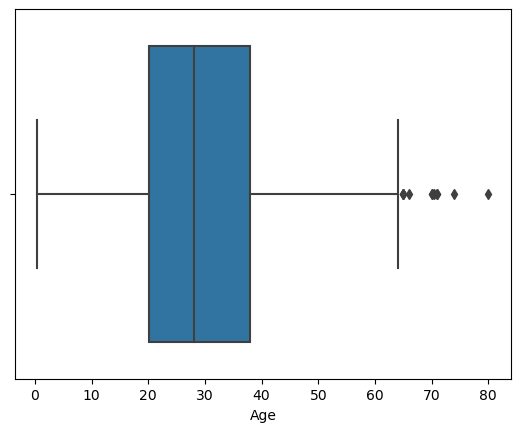

In [14]:
sns.boxplot(data['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

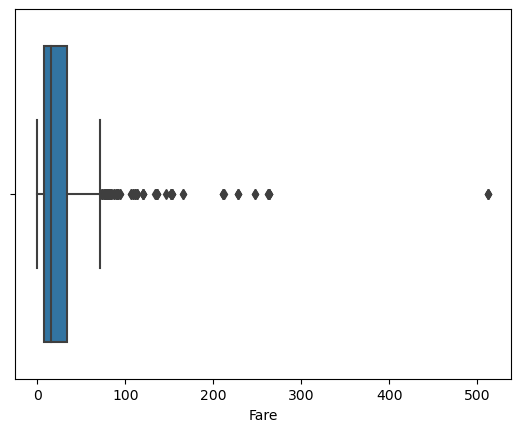

In [15]:
sns.boxplot(data['Fare'])

In [16]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
bins = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

Age_bins = bins.fit_transform(data[['Age']])
Fare_bins = bins.transform(data[['Fare']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Fare
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


In [28]:
data['Age_bins'] = Age_bins
data['Fare_bins']= Fare_bins

In [29]:
data.head()

,Survived,Age,Fare,Age_bins,Fare_bins
0,0,22.0,7.2500,4.0,1.0
1,1,38.0,71.2833,11.0,14.0
2,1,26.0,7.9250,6.0,1.0
3,1,35.0,53.1000,10.0,13.0
4,0,35.0,8.0500,10.0,1.0


In [30]:
data = data.drop(columns=['Age','Fare'])

In [31]:
data.head()

,Survived,Age_bins,Fare_bins
0,0,4.0,1.0
1,1,11.0,14.0
2,1,6.0,1.0
3,1,10.0,13.0
4,0,10.0,1.0


In [34]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [35]:
x.head()

,Age_bins,Fare_bins
0,4.0,1.0
1,11.0,14.0
2,6.0,1.0
3,10.0,13.0
4,10.0,1.0


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [42]:
x_train.head()

,Age_bins,Fare_bins
343,6.0,1.0
227,3.0,1.0
317,14.0,1.0
717,7.0,1.0
30,11.0,7.0


In [43]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [46]:
print("Accuracy Score")
accuracy_score(y_test,y_pred)

Accuracy Score


0.6853146853146853

In [47]:
print("Cross validation score")
np.mean(cross_val_score(model,x,y,cv=10,scoring='accuracy'))

Cross validation score


0.6935446009389671